In [38]:
# Draw pictures
# - Flattening image
# - logistic regression (one neuron)
# - cross entropy loss


# Python is not an ideal langauge for this
# Jupyter is not an ideal environment for htis
# They are the best we have

# In this example, I am not going to do fancy imports
# I want you to see the layout of torch and torchvision

In [1]:
import torch
import torchvision

In [2]:
# MNIST : hello world
# EMNIST : extended with letters in addition to digits
# KMNIST : Kuzushiji, Japanese characters
# QMNIST : newer MNIST with better source information

data_path = "../data/"

mnist_transforms = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_dataset = torchvision.datasets.MNIST(
    root=data_path, train=True, download=True, transform=mnist_transforms
)

In [3]:
# batch_size, shuffle
train_loader = torch.utils.data.DataLoader(train_dataset)

In [4]:
image, label = next(iter(train_loader))

In [5]:
image.shape

torch.Size([1, 1, 28, 28])

In [6]:
label.shape, label

(torch.Size([1]), tensor([5]))

In [7]:
import matplotlib.pyplot as plt

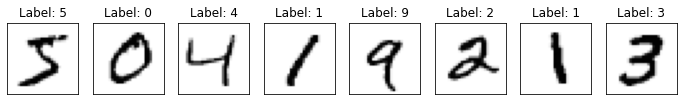

In [8]:
num_to_show = 8

fig, axes = plt.subplots(1, num_to_show, figsize=(12, 12))

for axis, (image, label) in zip(axes, train_loader):
    axis.imshow(image.squeeze(), cmap="Greys")
    axis.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    axis.set_title(f"Label: {label[0]}")

In [9]:
# Simple single neuron model; sometimes called logistic regression

num_pixels = 28 * 28

# Neuron parameters
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

In [10]:
weights.shape, bias.shape, image[0].shape, image[0].view(num_pixels, 1).shape

(torch.Size([784, 1]),
 torch.Size([1]),
 torch.Size([1, 28, 28]),
 torch.Size([784, 1]))

In [11]:
x = image[0]

In [12]:
weights @ x

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 1x784)

In [13]:
x = image[0].view(num_pixels, 1)

In [14]:
weights @ x

RuntimeError: mat1 and mat2 shapes cannot be multiplied (784x1 and 784x1)

In [15]:
weights.T @ x

tensor([[0.1308]])

In [16]:
# from torch import FloatTensor, FloatType

def linear(
    w: torch.FloatTensor, b: torch.FloatType, x: torch.FloatTensor
) -> torch.FloatType:
    return w.T @ x + b

In [17]:
linear(weights, bias, x)

tensor([[0.1308]])

In [18]:
def sigmoid(z: torch.FloatType) -> torch.FloatType:
    return 1 / (1 + torch.exp(-z))
#     return torch.clamp(z, min=0)

In [19]:
sigmoid(linear(weights, bias, x))

tensor([[0.5327]])

In [37]:
# Get down to two classes (let them pick)
idx1 = [i for i, t in enumerate(train_dataset.targets) if t == 1]
idx2 = [i for i, t in enumerate(train_dataset.targets) if t == 2]

idxs = idx1 + idx2
train_size = len(idxs)

train_loader2 = torch.utils.data.DataLoader(
    train_dataset, sampler=torch.utils.data.SubsetRandomSampler(idxs)
)

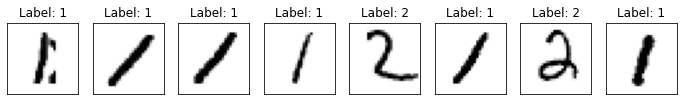

In [21]:
num_to_show = 8

fig, axes = plt.subplots(1, num_to_show, figsize=(12, 12))

for axis, (image, label) in zip(axes, train_loader2):
    axis.imshow(image.squeeze(), cmap="Greys")
    axis.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    axis.set_title(f"Label: {label[0]}")

In [22]:
# Optimization, binary cross-entropy loss (Log loss, aka logistic loss or cross-entropy loss)
# defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true

# Neuron parameters
num_pixels = 28 * 28
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

num_epochs = 10
learning_rate = 0.01

for epoch in range(num_epochs):

    cost = 0
    weights_derivatives = torch.zeros_like(weights)
    bias_derivative = torch.zeros_like(bias)

    for image, target in train_loader2:

        image = image.view(num_pixels, 1)
        target = 1 if target == 1 else 0

        prediction = sigmoid(linear(weights, bias, image))

        loss = target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction)
        cost -= loss

        dz = prediction - target
        weights_derivatives += image * dz
        bias_derivative += dz.squeeze()

    print(f"Cost at epoch {epoch} is {cost[0][0]}")

    weights_derivatives /= len(train_loader2)
    bias_derivative /= len(train_loader2)

    weights -= learning_rate * weights_derivatives
    bias -= learning_rate * bias_derivative

Cost at epoch 0 is 9793.345703125
Cost at epoch 1 is 7519.4990234375
Cost at epoch 2 is 6107.97900390625
Cost at epoch 3 is 5188.78125
Cost at epoch 4 is 4553.03662109375
Cost at epoch 5 is 4089.178466796875
Cost at epoch 6 is 3735.665283203125
Cost at epoch 7 is 3456.775390625
Cost at epoch 8 is 3230.551025390625
Cost at epoch 9 is 3042.90673828125


In [28]:
# Vectorize
train_loader2All = torch.utils.data.DataLoader(
    train_dataset, sampler=torch.utils.data.SubsetRandomSampler(idxs), batch_size=train_size
)

In [42]:
# Optimization, binary cross-entropy loss (Log loss, aka logistic loss or cross-entropy loss)
# defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true

# Neuron parameters
num_pixels = 28 * 28
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

num_epochs = 10
learning_rate = 0.01

for epoch in range(num_epochs):

    weights_derivatives = torch.zeros_like(weights)
    bias_derivative = torch.zeros_like(bias)

    images, targets = next(iter(train_loader2All))
    print(len(images), images.shape, images.view(train_size, num_pixels))
    predictions = sigmoid(linear(weights, bias, images.view(train_size, num_pixels).T))
    print(predictions.shape, targets.shape)

    loss = targets * torch.log(predictions) + (1 - target) * torch.log(1 - predictions)
    cost = loss.sum()

    dZ = predictions - targets
    weights_derivatives = (1/train_size) * (dZ @ images.view(train_size, num_pixels))
    bias_derivative = (1/train_size) * 



    break

    # for image, target in train_loader2:

    #     image = image.view(num_pixels, 1)
    #     target = 1 if target == 1 else 0

    #     prediction = sigmoid(linear(weights, bias, image))

    #     loss = target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction)
    #     cost -= loss

    #     dz = prediction - target
    #     weights_derivatives += image * dz
    #     bias_derivative += dz.squeeze()

    # print(f"Cost at epoch {epoch} is {cost[0][0]}")

    # weights_derivatives /= len(train_loader2)
    # bias_derivative /= len(train_loader2)

    # weights -= learning_rate * weights_derivatives
    # bias -= learning_rate * bias_derivative

12700 torch.Size([12700, 1, 28, 28]) tensor([[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        ...,
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]])
torch.Size([1, 12700]) torch.Size([12700])
torch.Size([1, 12700]) torch.Size([12700, 784])


In [ ]:
# Add validation metric
